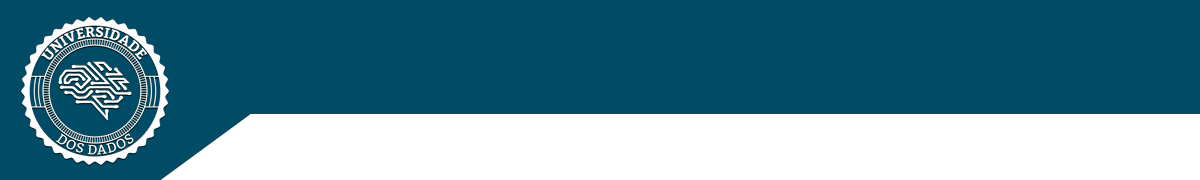
# Universidade dos Dados
GitHub: http://www.github.com/unidados/

Site de dicas: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Curta a nossa página no Facebook e fique por dentro das atualizações: <a href=http://facebook.com/universidadedosdados>Universidade dos Dados</a>

# Selecionando partes do Dataframe
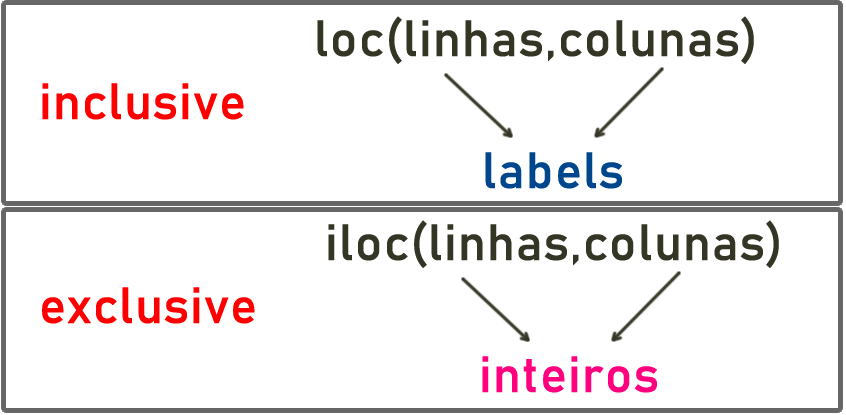

In [2]:
import numpy as np
import pandas as pd

In [3]:
file="C:\\projetos\\ufo.csv"
ufo = pd.read_csv(file)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# Métod loc

O método **loc** i utilizado para selecionar linhas e colunas por sua **label**. Nós podemos passar os seguintes parâmetros:

- Somente uma label
- Uma lista de labels
- Um slice de labels
- Uma série booleana
- Uma coluna (todas as labels)

In [4]:
# Trazendo a linha 0 e todas as colunas

ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [5]:
# Linhas 0, 1 e 2 e todas as colunas

ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [6]:
# Intervalo INCLUSIVO entre 0 e 2 e todas as colunas

ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [7]:
# A omissão do parâmetro referente a colunas, traz todas as colunas por padrão. INCLUSIVO

ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [8]:
# Linhas 0 a 2, da coluna City. INCLUSIVO

ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [9]:
# Linhas 0 a 2, colunas City e State

ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [11]:
# Podemos passar uma lista de labels de colunas

ufo[['City', 'State']].head(5)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [12]:
# Podemos também passar um intervalo de colunas. Nesse exemplo, das colunas City, até State

ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [164]:
# Trazendo a coluna State, nas linhas em que a cidade seja Oakland
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [165]:
# Podemos chegar ao mesmo resultado utilizando dot notation, como visto anteriormente, porém a utilização do loc é preferida
# por questões de performance e boa prática

ufo[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

# Vamos testar realmente as labels quando nossas linhas não tem índices inteiro

In [14]:
ufo_labels = ufo.set_index(['State'])

In [15]:
ufo_labels.head()

,City,Colors Reported,Shape Reported,Time
State,,,,
NY,Ithaca,NaN,TRIANGLE,6/1/1930 22:00
NJ,Willingboro,NaN,OTHER,6/30/1930 20:00
CO,Holyoke,NaN,OVAL,2/15/1931 14:00
KS,Abilene,NaN,DISK,6/1/1931 13:00
NY,New York Worlds Fair,NaN,LIGHT,4/18/1933 19:00


In [22]:
ufo_labels.loc['NY', 'Time'].head(10)

State
NY     6/1/1930 22:00
NY    4/18/1933 19:00
NY      1/8/1946 2:00
NY    2/20/1947 22:15
NY    7/14/1947 10:30
NY    8/12/1947 22:00
NY      8/1/1948 2:00
NY      1/2/1950 0:00
NY     6/30/1951 7:00
NY    2/10/1952 21:00
Name: Time, dtype: object

In [27]:
# Tentando realizar o filtro com loc e índices numéricos

ufo_labels.loc[0:10,'Time']

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [10] of <class 'int'>

# Método iloc

O método **iloc** também é utilizado para selecionar linhas e colunas, porém, diferente do loc onde passamos as labels, no iloc 
passamos um inteiro. Iloc vem de Indice Location:

- Um inteiro simples
- Uma lista de inteiros
- Um slice de inteiros
- Uma coluna (igual a lista de todos os inteiros)

In [166]:
#Linhas na posição 0 e 1, colunas na posição 0 e 3

ufo.iloc[[0, 1], [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [167]:
# Linhas: Intervalo de 0 a 2 (exclusivo). Colunas: Intervalo de 0 a 4 (exclusivo)

ufo.iloc[0:2, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [24]:
# Linhas de 0 a 4, exclusive e todas as colunas

ufo.iloc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [25]:
# Podemos chegar ao mesmo resultado com a notação de bracktes, mas prefira a notação de iloc por ser mais explícito

ufo[0:4]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


The [**`ix`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html) method is used to select rows and columns by **label or integer position**, and should only be used when you need to mix label-based and integer-based selection in the same call.

In [163]:
# Podemos utilizar 
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


# Método ix

**Regras para utilização de números com `ix`:**

- Se o índice for uma **string**, numéros serão tratados com posições, e os slices são **exclusivos**
- Se o índice for um **inteiro**, números são tratados como labels, então os slices são **inclusivos**


In [31]:
drinks = pd.read_csv('c:\\projetos\\drinks.csv', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
country,,,,,,
Afghanistan,0,0,0,0.0,34.660.000,Asia
Albania,89,132,54,4.9,2.876.000,Europe
Algeria,25,0,14,0.7,40.061.000,Africa
Andorra,245,138,312,12.4,77.281.000,Europe
Angola,217,57,45,5.9,28.081.000,Africa


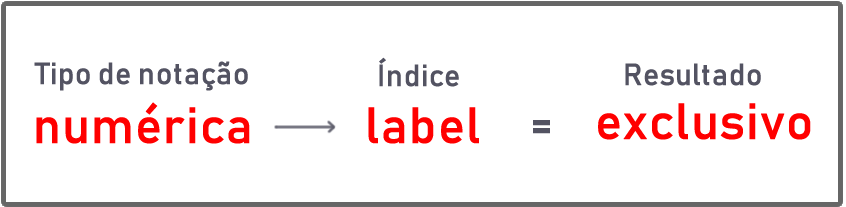

In [171]:
# Label: Albania - Coluna: 0

drinks.ix['Albania', 0]

89

In [33]:
# Linha: 1 - Coluna: beer_servings (inclusive)

drinks.ix[0:3, 'beer_servings']

country
Afghanistan     0
Albania        89
Algeria        25
Name: beer_servings, dtype: int64

In [34]:
# Linha: 1 - Coluna: beer_servings

drinks.ix[1, 'beer_servings']

89

In [35]:
# Linhas de Albania a Andorra e colunas de 0 a 2. O tipo das colunas também é label, então será exclusivo

drinks.ix['Albania':'Andorra', 0:2]

,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


In [36]:
# A notação aplicada é toda do mesmo tipo, então o resultado será inclusive

drinks.ix['Albania':'Andorra', 'beer_servings':'population']

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population
country,,,,,
Albania,89,132,54,4.9,2.876.000
Algeria,25,0,14,0.7,40.061.000
Andorra,245,138,312,12.4,77.281.000
